<a href="https://colab.research.google.com/github/PRihana/Machine-learning/blob/master/31_03_2020_PreProcessing(ML)(scaling%2Ccat_num_conversion)_Contd_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('movie_metadata.csv')

In [0]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [0]:
df.shape

(5043, 28)

In [0]:
df.movie_title

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [0]:
df.movie_title.duplicated().sum()

126

In [0]:
df.movie_title.nunique()

4917

In [0]:
5043-4917

126

In [0]:
df.movie_title[df.movie_title.duplicated()][137]

'The Legend of Tarzan\xa0'

In [0]:
df[df.movie_title == 'The Legend of Tarzan\xa0']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
63,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000


In [0]:
df.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [0]:
df.shape

(5043, 28)

In [0]:
help(df.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset:collections.abc.Hashable=None, keep:Union[str, bool]='first', inplace:bool=False, ignore_index:bool=False) -> Union[_ForwardRef('DataFrame'), NoneType] method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to drop duplicates in place or

In [0]:
df.drop_duplicates("movie_title")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [0]:
is it modifying the value in df?

In [0]:
data = df.drop_duplicates("movie_title")
print(data.shape)
print(df.shape)

(4917, 28)
(5043, 28)


In [0]:
data.movie_title.nunique()

4917

In [0]:
data.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [0]:
data.gross

0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040            NaN
5041        10443.0
5042        85222.0
Name: gross, Length: 4917, dtype: float64

In [0]:
data.budget

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040         1400.0
5041            NaN
5042         1100.0
Name: budget, Length: 4917, dtype: float64

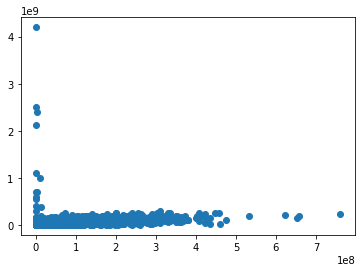

In [0]:
plt.scatter(data.gross,data.budget)

In [0]:
numerical_cols = data.columns[data.dtypes != object]

In [0]:
(data.dtypes != object).sum()

16

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:125

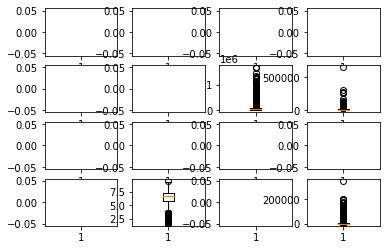

In [0]:
for ind in range((data.dtypes != object).sum()):
    plt.subplot(4,4,ind+1)
    plt.boxplot(data[numerical_cols[ind]])

In [0]:
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


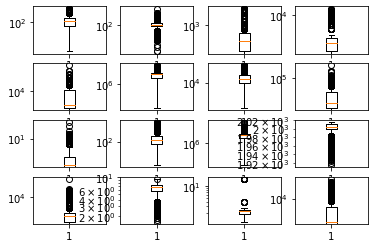

In [0]:
for ind in range((data.dtypes != object).sum()):
    plt.subplot(4,4,ind+1)
    plt.boxplot(data[numerical_cols[ind]])
    plt.yscale("log")

In [0]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4.917000e+03,4.917000e+03,4917.000000,4917.000000,4917.000000,4.917000e+03,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000
mean,137.983566,107.089963,690.871028,631.203515,6493.369450,4.764451e+07,8.263723e+04,9578.276998,1.377039,267.651348,3.654150e+07,2002.443567,1621.649470,6.437584,2.222267,7346.799675
std,119.626921,25.244900,2803.136325,1621.909129,15094.893157,6.117379e+07,1.383091e+05,18162.789993,2.021037,372.101433,9.517021e+07,12.320819,4005.629524,1.127740,1.355487,19204.348861
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,608.000000,8.070311e+06,8.367000e+03,1395.000000,0.000000,64.000000,7.000000e+06,1999.000000,278.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,51.000000,369.000000,982.000000,3.697637e+07,3.315800e+04,3049.000000,1.000000,154.000000,2.300000e+07,2005.000000,593.000000,6.600000,2.222267,158.000000
75%,191.000000,118.000000,213.000000,631.203515,11000.000000,5.085989e+07,9.376700e+04,13616.000000,2.000000,319.000000,4.000000e+07,2010.000000,915.000000,7.200000,2.350000,2000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [0]:
data_sc = data.copy()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(data[['num_critic_for_reviews']])
data_sc[['num_critic_for_reviews']]=sc.transform(data[['num_critic_for_reviews']])

In [0]:
data_sc['num_critic_for_reviews'].describe()

count    4917.000000
mean        0.168699
std         0.147324
min         0.000000
25%         0.060345
50%         0.134236
75%         0.233990
max         1.000000
Name: num_critic_for_reviews, dtype: float64

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(data[numerical_cols])
data_sc[numerical_cols]=sc.transform(data[numerical_cols])

In [0]:
data_sc.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000
mean,0.168699,0.198591,0.030038,0.027444,0.010146,0.062648,0.048902,0.014585,0.032024,0.052708,0.008700,0.864436,0.011837,0.612352,0.070328,0.021051
std,0.147324,0.050089,0.121875,0.070518,0.023586,0.080438,0.081851,0.027656,0.047001,0.073552,0.022660,0.123208,0.029238,0.142752,0.091463,0.055027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060345,0.170635,0.000304,0.005783,0.000950,0.010612,0.004949,0.002124,0.000000,0.012453,0.001667,0.830000,0.002029,0.531646,0.045209,0.000000
50%,0.134236,0.190476,0.002217,0.016043,0.001534,0.048621,0.019620,0.004643,0.023256,0.030243,0.005476,0.890000,0.004328,0.632911,0.070328,0.000453
75%,0.233990,0.220238,0.009261,0.027444,0.017188,0.066876,0.055488,0.020733,0.046512,0.062858,0.009524,0.940000,0.006679,0.708861,0.078947,0.005731
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

What is normal Distribution?

what is standardization?

what is z-test?

what is t-test?

In [0]:
data_sc1 = data.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data[['num_critic_for_reviews']])
data_sc[['num_critic_for_reviews']]=sc.transform(data[['num_critic_for_reviews']])

In [0]:
data['num_critic_for_reviews'].describe()

count    4917.000000
mean      137.983566
std       119.626921
min         1.000000
25%        50.000000
50%       110.000000
75%       191.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [0]:
data_sc['num_critic_for_reviews'].describe()

count    4.917000e+03
mean     1.520037e-16
std      1.000102e+00
min     -1.145206e+00
25%     -7.355578e-01
50%     -2.339474e-01
75%      4.432265e-01
max      5.643254e+00
Name: num_critic_for_reviews, dtype: float64

My twitter follower

Mounika's Facebook friends count

How can you say who is popular? 20000 twitter followers 2000 friends Mean of twitter follower count - Mean of facebook frirends -

In [0]:
data_sc1 = data.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data[numerical_cols])
data_sc1[numerical_cols]=sc.transform(data[numerical_cols])

In [0]:
data_sc1.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03,4.917000e+03
mean,1.520037e-16,-9.821308e-16,-1.613515e-15,-4.803177e-16,6.880357e-16,-2.227671e-16,-6.769493e-16,3.220256e-16,-1.529972e-16,-3.521351e-16,-1.217858e-15,-1.920234e-14,-1.273076e-15,-5.205596e-16,-6.210882e-16,6.418498e-15
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.145206e+00,-3.965163e+00,-2.464887e-01,-3.892127e-01,-4.302137e-01,-7.789153e-01,-5.975066e-01,-5.274108e-01,-6.814219e-01,-7.166822e-01,-3.839962e-01,-7.016771e+00,-4.048838e-01,-4.290064e+00,-7.690027e-01,-3.825981e-01
25%,-7.355578e-01,-5.581878e-01,-2.439912e-01,-3.072023e-01,-3.899311e-01,-6.469802e-01,-5.370417e-01,-4.505976e-01,-6.814219e-01,-5.473563e-01,-3.104385e-01,-2.795202e-01,-3.354744e-01,-5.654219e-01,-2.746653e-01,-3.825981e-01
50%,-2.339474e-01,-1.620279e-01,-2.282929e-01,-1.616799e-01,-3.651520e-01,-1.744086e-01,-3.577801e-01,-3.595230e-01,-1.865762e-01,-3.054622e-01,-1.423016e-01,2.075100e-01,-2.568271e-01,1.440338e-01,1.271308e-13,-3.743699e-01
75%,4.432265e-01,4.322119e-01,-1.704946e-01,0.000000e+00,2.985837e-01,5.256666e-02,8.047843e-02,2.223300e-01,3.082695e-01,1.380104e-01,3.634388e-02,6.133685e-01,-1.764320e-01,6.761255e-01,9.424323e-02,-2.784444e-01
max,5.643254e+00,1.600130e+01,7.959441e+00,1.379305e+01,4.197254e+01,1.165424e+01,1.162100e+01,3.563426e+01,2.059694e+01,1.288046e+01,4.375195e+01,1.100399e+00,3.380046e+01,2.715810e+00,1.016545e+01,1.779222e+01


In [0]:
data.columns[data.dtypes == object]

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [0]:
data.color

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 4917, dtype: object

In [0]:
data_sc.color.isna().sum()

19

In [0]:
data_sc.color.value_counts()

Color               4694
 Black and White     204
Name: color, dtype: int64

In [0]:
data_sc.color.mode()[0]

'Color'

In [0]:
data_sc.color = data_sc.color.fillna(data_sc.color.mode()[0])
data_sc.color.value_counts().index[1]

' Black and White'

In [0]:
data_sc.color.apply(lambda x:1 if x=='Color' else 0)

0       1
1       1
2       1
3       1
4       1
       ..
5038    1
5039    1
5040    1
5041    1
5042    1
Name: color, Length: 4917, dtype: int64

In [0]:
data_sc.color

0       Color
1       Color
2       Color
3       Color
4       Color
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 4917, dtype: object

In [55]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(data_sc.color)
lb.transform(data_sc.color)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [57]:
lb.transform(data_sc.color)[111]

array([0])

In [58]:
data_sc.color[data_sc.color==" Black and White"]

111      Black and White
149      Black and White
257      Black and White
272      Black and White
286      Black and White
              ...       
5005     Black and White
5008     Black and White
5015     Black and White
5022     Black and White
5028     Black and White
Name: color, Length: 204, dtype: object

In [59]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit_transform(data_sc.color)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [60]:
lb.transform(["Color","Color"," Black and White"])

array([[1],
       [1],
       [0]])

In [61]:
lb.classes_

array([' Black and White', 'Color'], dtype='<U16')

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_sc.color)
le.transform(data_sc.color)

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
le.classes_

array([' Black and White', 'Color'], dtype=object)

In [64]:
data.language.nunique()

47

In [65]:
data.language.isna().sum()

12

In [66]:
data_sc.language = data_sc.language.fillna(data_sc.language.mode()[0])
data_sc.language.isna().sum()

0

In [67]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lbenc = lb.fit_transform(data_sc.language)
lbenc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
lbenc.shape

(4917, 47)

In [69]:
lbenc[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [70]:
data_sc.language[data_sc.language=='Aboriginal']

377     Aboriginal
3504    Aboriginal
Name: language, dtype: object

In [71]:
data_sc.language[377]

'Aboriginal'

In [72]:
lbenc[3504]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [73]:
lbenc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
lbenc[[np.argmax(i)==0 for i in lbenc]]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [75]:
data_sc.language[[np.argmax(i)==0 for i in lbenc]]

377     Aboriginal
3504    Aboriginal
Name: language, dtype: object

In [76]:
lb.classes_

array(['Aboriginal', 'Arabic', 'Aramaic', 'Bosnian', 'Cantonese',
       'Chinese', 'Czech', 'Danish', 'Dari', 'Dutch', 'Dzongkha',
       'English', 'Filipino', 'French', 'German', 'Greek', 'Hebrew',
       'Hindi', 'Hungarian', 'Icelandic', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Kazakh', 'Korean', 'Mandarin', 'Maya',
       'Mongolian', 'None', 'Norwegian', 'Panjabi', 'Persian', 'Polish',
       'Portuguese', 'Romanian', 'Russian', 'Slovenian', 'Spanish',
       'Swahili', 'Swedish', 'Tamil', 'Telugu', 'Thai', 'Urdu',
       'Vietnamese', 'Zulu'], dtype='<U10')

In [77]:
data_sc.language[0]

'English'

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_sc.language)
le.transform(data_sc.language)

array([11, 11, 11, ..., 11, 11, 11])

In [79]:
le.transform(data_sc.language).shape

(4917,)

In [80]:
pd.Series(le.transform(data_sc.language)).unique()

array([11, 22, 13, 26,  0, 38, 12, 17, 36, 27, 24, 42,  4, 19, 14,  2, 21,
        9,  8, 16,  5, 28, 40, 25, 43, 33,  3, 29, 18, 34,  7,  1, 30,  6,
       23, 46, 31, 41, 10, 45, 20, 44, 35, 32, 37, 15, 39])

In [81]:
le.classes_

array(['Aboriginal', 'Arabic', 'Aramaic', 'Bosnian', 'Cantonese',
       'Chinese', 'Czech', 'Danish', 'Dari', 'Dutch', 'Dzongkha',
       'English', 'Filipino', 'French', 'German', 'Greek', 'Hebrew',
       'Hindi', 'Hungarian', 'Icelandic', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Kazakh', 'Korean', 'Mandarin', 'Maya',
       'Mongolian', 'None', 'Norwegian', 'Panjabi', 'Persian', 'Polish',
       'Portuguese', 'Romanian', 'Russian', 'Slovenian', 'Spanish',
       'Swahili', 'Swedish', 'Tamil', 'Telugu', 'Thai', 'Urdu',
       'Vietnamese', 'Zulu'], dtype=object)

In [82]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(data_sc[['language']])
ohe.transform(data_sc[['language']])

<4917x47 sparse matrix of type '<class 'numpy.float64'>'
	with 4917 stored elements in Compressed Sparse Row format>

In [83]:
ohe

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [84]:
pd.get_dummies(data_sc['language'])

,Aboriginal,Arabic,Aramaic,Bosnian,Cantonese,Chinese,Czech,Danish,Dari,Dutch,Dzongkha,English,Filipino,French,German,Greek,Hebrew,Hindi,Hungarian,Icelandic,Indonesian,Italian,Japanese,Kannada,Kazakh,Korean,Mandarin,Maya,Mongolian,None,Norwegian,Panjabi,Persian,Polish,Portuguese,Romanian,Russian,Slovenian,Spanish,Swahili,Swedish,Tamil,Telugu,Thai,Urdu,Vietnamese,Zulu
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5039,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5040,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5041,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


StandardScaler

LabelBinarizer

LabelEncoder

OneHotEncoder

pd.getdummies

In [0]:
branches = pd.Series(['ECE','CSE',"ECE","IT","ECE","IT","MECH"])

In [86]:
lb1 = LabelBinarizer()
lb1.fit_transform(branches)

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [87]:
lb1.classes_

array(['CSE', 'ECE', 'IT', 'MECH'], dtype='<U4')

In [88]:
le1 = LabelEncoder()
le1.fit_transform(branches)

array([1, 0, 1, 2, 1, 2, 3])

In [89]:
branches

0     ECE
1     CSE
2     ECE
3      IT
4     ECE
5      IT
6    MECH
dtype: object

In [0]:
le1.classes_

In [90]:
pd.get_dummies(branches)

,CSE,ECE,IT,MECH
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
5,0,0,1,0
6,0,0,0,1
